# K-Means Clustering

In [143]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, silhouette_samples

## Generate some randomized data

In [40]:
centroids = [
    {
        'coords': [-2.7, 1.25],
        'spread': 0.1
    },
    {
        'coords': [-2.7, 1.75],
        'spread': 0.1
    },
    {
        'coords': [-2.7, 2.8],
        'spread': 0.1
    },
    {
        'coords': [-1.5, 2.25],
        'spread': 0.3
    },
    {
        'coords': [0.25, 2.25],
        'spread': 0.34
    }   
]

In [46]:
pointsPerCluster = 500
allX1 = None
allX2 = None
for centroid in centroids:
    x1 = np.random.normal(centroid['coords'][0], centroid['spread'], size=(pointsPerCluster, 1))
    x2 = np.random.normal(centroid['coords'][1], centroid['spread'], size=(pointsPerCluster, 1))
    if allX1 is None:
        allX1 = x1
    else:
        allX1 = np.concatenate((allX1, x1))
    if allX2 is None:
        allX2 = x2
    else:
        allX2 = np.concatenate((allX2, x2))
X = np.array(list(zip(allX1, allX2))).reshape(len(allX1), 2)

## Plot the points

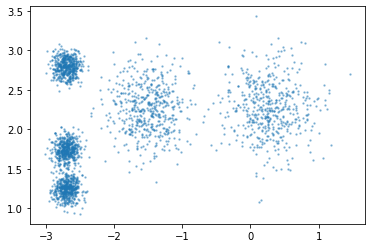

In [69]:
plt.scatter(allX1, allX2, s=2.0, alpha=0.4)
plt.show()

## Train a K-means clustering algorithm to the data

In [50]:
k = 5
kmeans = KMeans(n_clusters=k)
kmeans.fit(X)
y_pred = kmeans.predict(X)

### Make some prediction

In [66]:
print(X[600])

[-2.727475    1.65380628]


In [67]:
print(y_pred[600])

4


### Show the cluster centers

In [77]:
foundCentroids = kmeans.cluster_centers_
foundCentroids

array([[-2.69168578,  1.24391725],
       [ 0.27290853,  2.2704553 ],
       [-2.68831736,  2.79440197],
       [-1.4879259 ,  2.25995256],
       [-2.69785043,  1.74768079]])

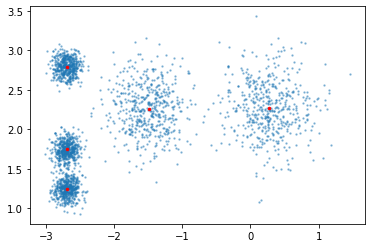

In [78]:
plt.clf()
plt.scatter(allX1, allX2, s=2.0, alpha=0.4)
plt.scatter(foundCentroids[:, 0], foundCentroids[:, 1], s=6.0, alpha=1, c='r')
plt.show()

### Plot the decision boundaries

In [90]:
resolution = 0.01
xx1, xx2 = np.meshgrid(np.arange(-3.2, 1.9, resolution), np.arange(0.7, 3.6, resolution))

Z = kmeans.predict(np.c_[xx1.ravel(), xx2.ravel()])
Z = Z.reshape(xx1.shape)

<Figure size 432x288 with 0 Axes>

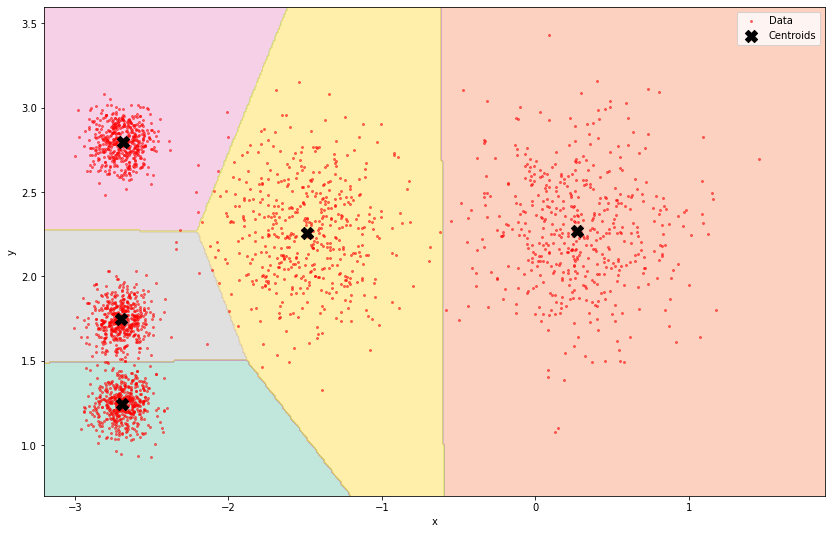

In [135]:
plt.clf()
cmap = plt.get_cmap('Set2')
plt.figure(figsize=(14,9))
plt.contourf(xx1, xx2, Z, alpha=0.4, cmap=cmap)
plt.scatter(allX1, allX2, s=4, alpha=0.5, c='r', label='Data')
plt.scatter(foundCentroids[:, 0], foundCentroids[:, 1], s=149, alpha=1, c='k', label='Centroids', marker='X')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()

## Determining the optimal number of clusters

In the above example, we explicitly chose `5` clusters since we knew that the data is organized in five clusters per construction. We can choose different metrics to find the optimal cluster without having to know the number *a priori*.

### Training for k=2, ..., 8 clusters

In order to find out the optimal number of clusters, we train the model on a different number `k` of clusters and compare different metrics.

In [138]:
kRange = range(2, 9)
inertiaScores = []
silhouetteScores = []
for k in kRange:
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(X)
    inertiaScores.append(kmeans.inertia_)
    silhouetteScores.append(silhouette_score(X, kmeans.labels_))

### Inertia

Inertia is defined as the mean squared distance between each instance and its closest centroid.

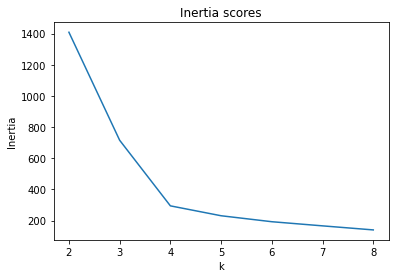

In [141]:
plt.clf()
plt.plot(kRange, inertiaScores)
plt.xlabel('k')
plt.ylabel('Inertia')
plt.title('Inertia scores')
plt.show()

The inertia always decreases with increasing number of clusters `k`. Hence, inertia alone is never a useful metric for finding the optimal number of clusters. Typically, the inertia plot features an *elbow*, in this case seen at `k=4`. The values of `k` at or around this elbow typically represent good values for the number of clusters.

### Silhouette score

The silhouette score is given as<br>
$\frac{b-a}{\text{max}(a, b)}$<br>
where $a$ denotes the intra-cluster distance (i.e. the mean distance of one instance to the other instances within the instance's cluster) and $b$ denotes the mean nearest-cluster distance (i.e. the mean distance of one instance to the instances of the next closest cluster such that $b$ is minimized).<br><br>
The silhouette score varies between `-1` and `+1`. A value close to `+1` indicates that the instance is well inside its own cluster and far away from other clusters. A value close to `0` indicates that the instance is typically near the boundary of its cluster. Finally, a value close to `-1` indicates that the instance is closer to another closer than within the proximity of its own cluster which might indicate that this instance was assigned to the wrong cluster.

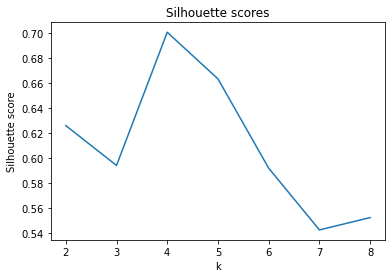

In [142]:
plt.clf()
plt.plot(kRange, silhouetteScores)
plt.xlabel('k')
plt.ylabel('Silhouette score')
plt.title('Silhouette scores')
plt.show()

In this case, the silhouette score is maximized for `k=4` (where the *elbow* was present in the inertia plot as well), but `k=5` also delivers a high silhouette score. In this case, choosing `k=4` would actually lead to a sub-optimal clustering as we know it, since in reality, we created data for five clusters. Most likely, the KMeans algorithm assumes that for `k=4`, the data for the two clusters in the lower left region of the plot belong to the same cluster.

### Silhouette diagrams

We can also plot the silhouette score of each instance individually, sorted by the cluster the instance belongs to. This presentation is called a *silhouette diagram*.

For k = 2 the average silhouette score is 0.6269969718105624
For k = 3 the average silhouette score is 0.5941077683965447
For k = 4 the average silhouette score is 0.7006150659109404
For k = 5 the average silhouette score is 0.6632543791054805
For k = 6 the average silhouette score is 0.5919132265527256
For k = 7 the average silhouette score is 0.5470261607644986
For k = 8 the average silhouette score is 0.5535594203275116


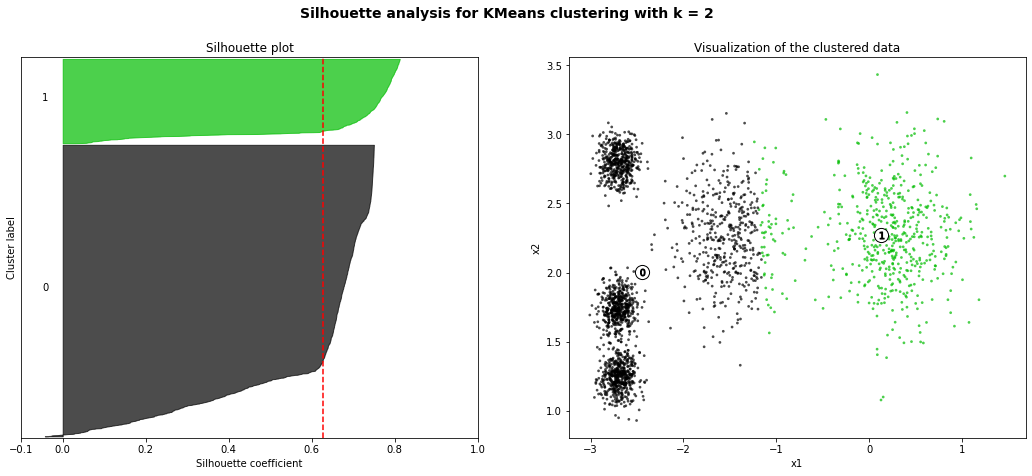

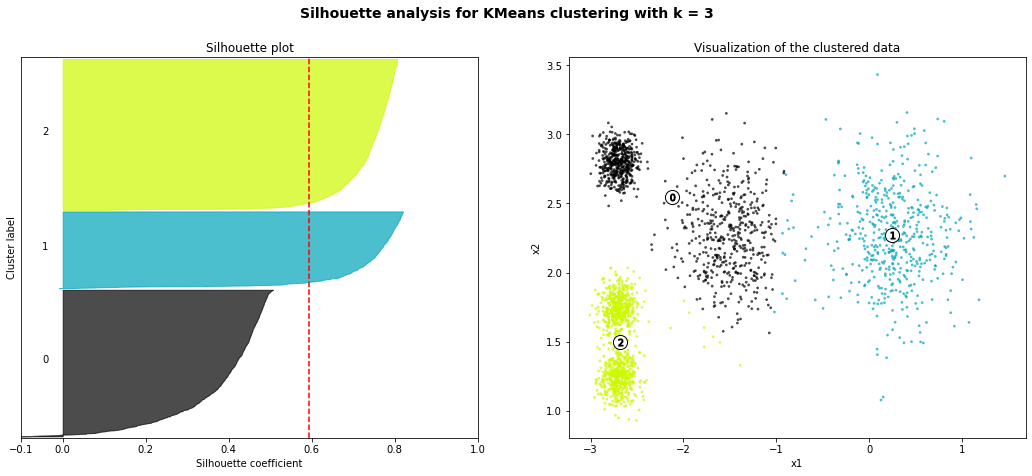

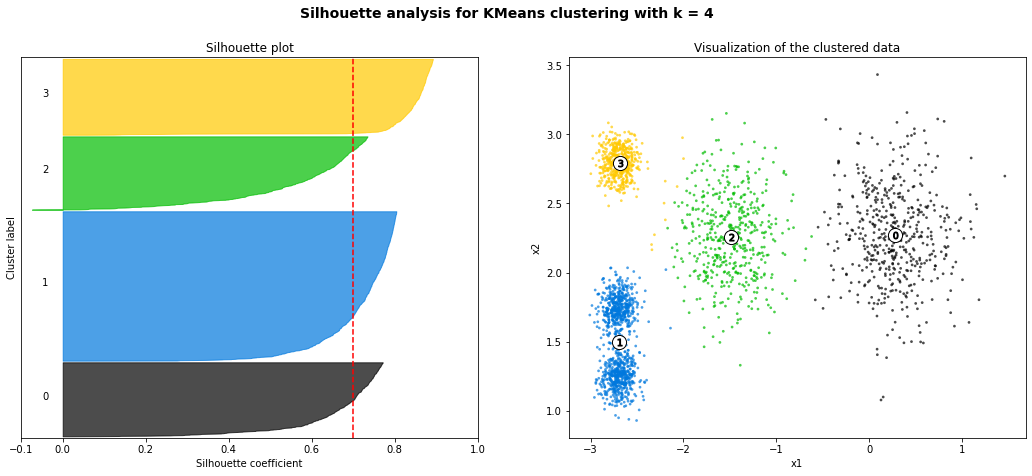

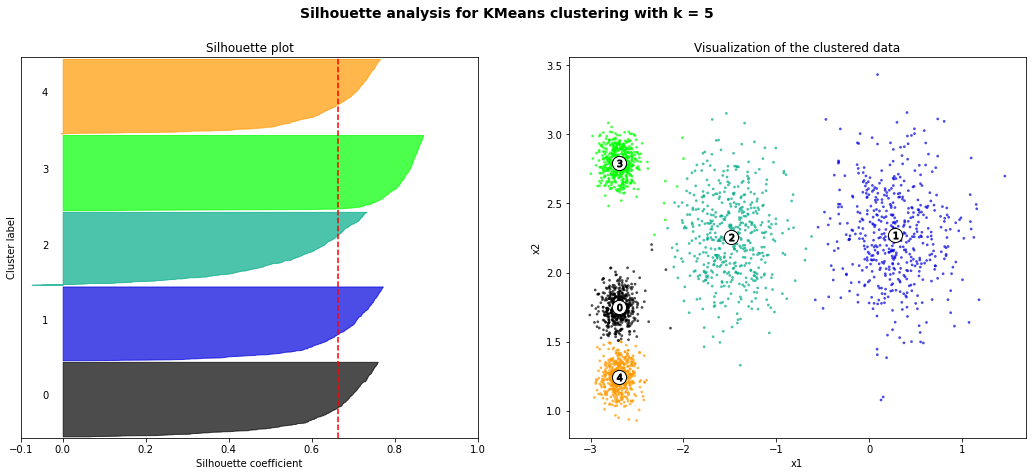

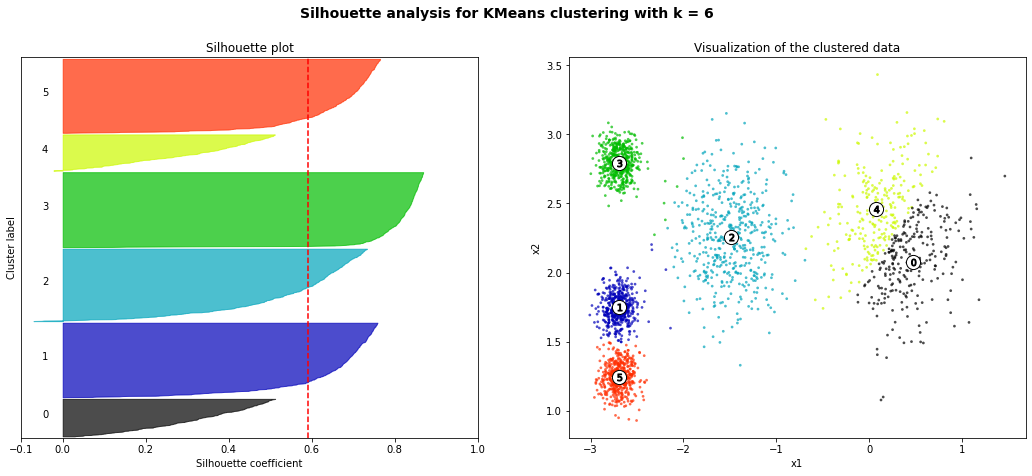

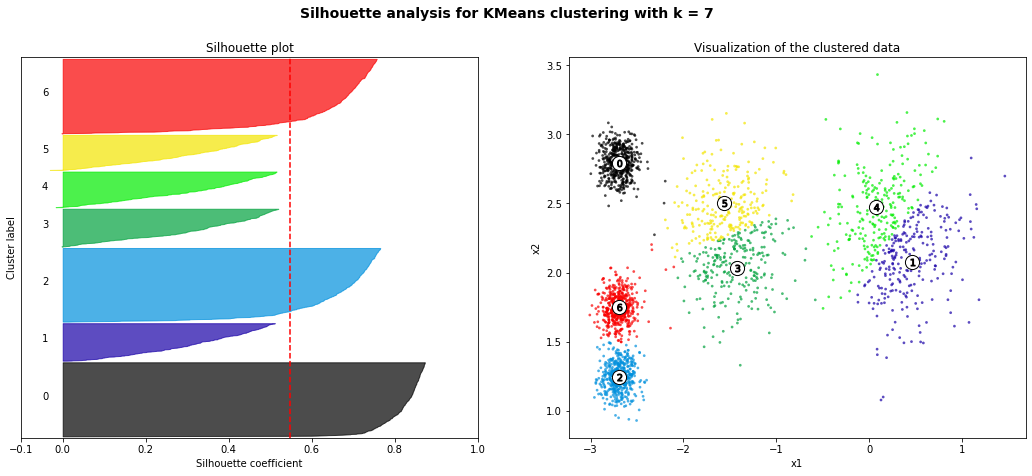

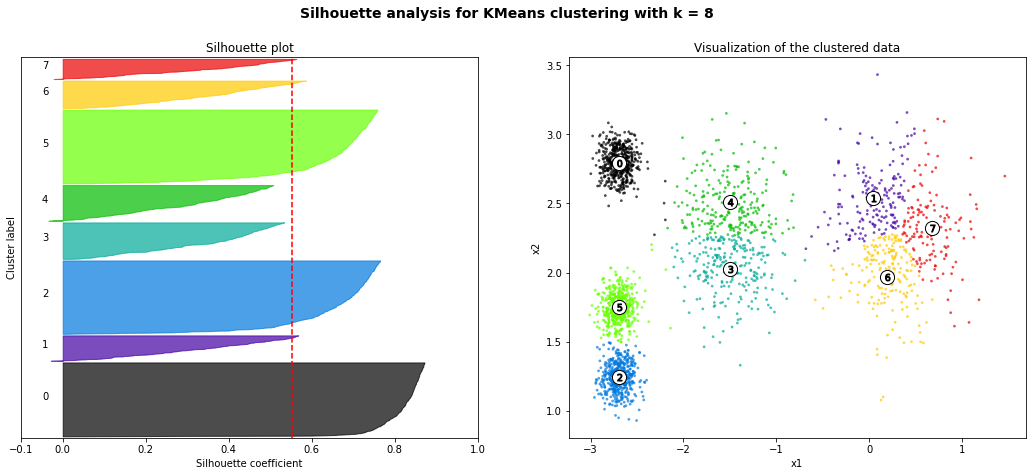

In [160]:
# x-axis limits and ranges
xLimits = [-0.1, 1]
xRanges = [-0.1, 0.0, 0.2, 0.4, 0.6, 0.8, 1.0]

# Iterate over all numbers of clusters
kRange = range(2, 9)
for k in kRange:
    # Train the model
    clusterer = KMeans(n_clusters=k)
    cluster_labels = clusterer.fit_predict(X)
    
    # We create two plots (silhoutte plot and scatter plot) per row (each row is one number of clusters)
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # Left plot: silhouette plot
    ax1.set_xlim(xLimits)
    ax1.set_ylim([0, len(X) + (k + 1) * 10])
    sample_silhouette_values = silhouette_samples(X, cluster_labels)
    y_lower = 10
    # Iterate over all clusters within the current number of clusters
    for i in range(k):
        # Get the silhouette values of all instances for this cluster
        ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]
        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / k)
        ax1.fill_betweenx(np.arange(y_lower, y_upper), 0, ith_cluster_silhouette_values, facecolor=color, edgecolor=color, alpha=0.7)

        # Cluster label
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # New y_lower for next plot
        y_lower = y_upper + 10

    # Plot and axis titles and ticks
    ax1.set_title("Silhouette plot")
    ax1.set_xlabel("Silhouette coefficient")
    ax1.set_ylabel("Cluster label")
    ax1.set_yticks([])
    ax1.set_xticks(xRanges)

    # Add the average silhouette score for all instances
    silhouette_avg = silhouette_score(X, cluster_labels)
    print("For k =", k, "the average silhouette score is", silhouette_avg)
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    # Right plot: scatter plot of data and clusters
    colors = cm.nipy_spectral(cluster_labels.astype(float) / k)
    ax2.scatter(X[:, 0], X[:, 1], marker='.', s=30, lw=0, alpha=0.7, c=colors, edgecolor='k')

    # Cluster labels
    centers = clusterer.cluster_centers_
    ax2.scatter(centers[:, 0], centers[:, 1], marker='o', c="white", alpha=1, s=200, edgecolor='k')
    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1, s=50, edgecolor='k')

    # Plot and axis titles
    ax2.set_title("Visualization of the clustered data")
    ax2.set_xlabel("x1")
    ax2.set_ylabel("x2")

    plt.suptitle(("Silhouette analysis for KMeans clustering with k = %d" % k), fontsize=14, fontweight='bold')

plt.show()

The silhouette plot features the silhouette scores of each instance, sorted by the labels of the clusters. Within each cluster, the instances are sorted by descending silhouette scores (from top to bottom). The higher the shape for each cluster, the more instances the closer contains. The wider the shape for each cluster, the higher the silhouette scores is for the instances in the clusters.<br><br>
Again, the silhouette score has a maximum for `k=4`. As we assumed above, the two clusters on the lower left part of the plot are clustered together and considered as one cluster for `k=4`. By looking at the silhouette plot however, we realize that `k=5` is the better choice since in this case, all clusters are nearly of the same size and all silhouette shapes of the clusters reach the average silhouette score, while for `k=4`, the cluster with label `1` is significantly larger than the other clusters. Hence, following this analysis, we would pick `k=5`.